### 1. Scouting deportivo
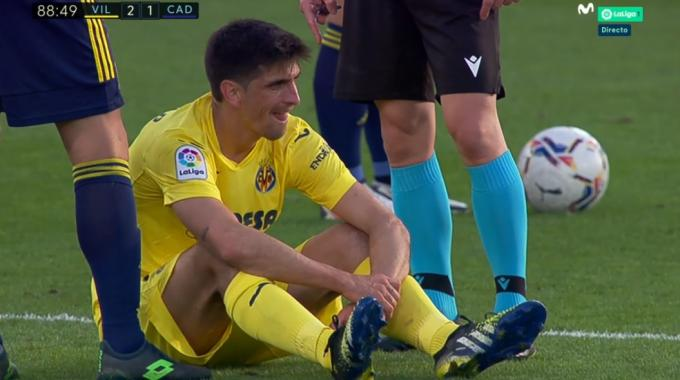

Se ha lesionado Gerard Moreno. El entrenador del Villarreal necesita una lista de jugadores similares para sustituirle.  
Utilizando el dataset proporcionado:

1. Busca la posición de Gerard y filtra el dataset para obtener los jugadores de la misma demarcación (`team_position`)
2. Selecciona solo las variables numéricas y excluye las relacionadas con los porteros (goalkeeping_XXX y gk_XXX) y otras que consideres irrelevantes
3. Implementa un algoritmo k-means con el número de clusters adecuado
4. Obtén un fichero csv con los jugadores que entren en el mismo cluster que Gerard, y ordénalos de mayor a menor valor de mercado

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
# Posición de Gerard Moreno
df.loc[df.short_name.str.contains('Gerard Moreno')].team_position

367    ST
Name: team_position, dtype: object

In [5]:
# Filtrar strickers (delanteros)
df2 = df.loc[df.team_position=="ST"]
df2

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,High/High,Normal,Yes,159800000.0,"#Engine, #Distance Shooter, #Clinical Finisher",ST,10.0,NaN,2010-07-01,2024.0,ST,9.0,70.0,91.0,79.0,81.0,47.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,86+3,86+3,86+3,82+3,84+3,84+3,84+3,82+3,83+3,83+3,83+3,82+3,79+3,79+3,79+3,82+3,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3
17,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,1988-06-02,173,70,Argentina,Manchester City,89,89,60000000,300000,ST,Right,4,4,4,High/Medium,Stocky,Yes,111000000.0,"#Dribbler, #Clinical Finisher, #Complete Forward",ST,10.0,NaN,2011-07-28,2021.0,ST,9.0,80.0,90.0,77.0,88.0,33.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,13,15,6,11,14,87+3,87+3,87+3,85+3,87+3,87+3,87+3,85+3,85+3,85+3,85+3,83+3,77+3,77+3,77+3,83+3,60+3,58+3,58+3,58+3,60+3,56+3,50+3,50+3,50+3,56+3
19,176580,https://sofifa.com/player/176580/luis-suarez/2...,L. Suárez,Luis Alberto Suárez Díaz,32,1987-01-24,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,High/Medium,Normal,Yes,108700000.0,"#Distance Shooter, #Strength, #Clinical Finish...",ST,9.0,NaN,2014-07-11,2021.0,NaN,NaN,73.0,89.0,80.0,84.0,51.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,86+5,86+5,86+5,83+5,85+5,85+5,85+5,83+5,84+5,84+5,84+5,82+5,79+5,79+5,79+5,82+5,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
20,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,30,1988-08-21,184,80,Poland,FC Bayern München,89,89,64500000,235000,ST,Right,4,4,4,High/Medium,Normal,Yes,106400000.0,#Clinical Finisher,ST,9.0,NaN,2014-07-01,2021.0,LS,9.0,77.0,87.0,74.0,85.0,41.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Beat Offside Trap, Speed Dribbler (CPU ...",62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19,15,6,12,8,10,86+3,86+3,86+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,80+3,77+3,77+3,77+3,80+3,61+3,62+3,62+3,62+3,61+3,58+3,57+3,57+3,57+3,58+3
34,179813,https://sofifa.com/player/179813/edinson-cavan...,E. Cavani,Edinson Roberto Cavani Gómez,32,1987-02-14,185,77,Uruguay,Paris Saint-Germain,88,88,47000000,195000,ST,Right,4,4,3,High/High,Lean,Yes,87000000.0,#Engine,ST,9.0,NaN,2013-07-16,2020.0,N

In [6]:
df.shape, df2.shape

((18278, 104), (458, 104))

In [7]:
# Filtrar columnas numéricas y de no-porteros
from pandas.api.types import is_numeric_dtype

sel = ['short_name']

for col in df2.columns:
    if is_numeric_dtype(df2[col]) and not col.startswith('goalk') and not col.startswith('gk'):
        sel.append(col)

sel.remove('team_jersey_number')
sel.remove('sofifa_id')
sel.remove('nation_jersey_number')
sel.remove('contract_valid_until')

In [8]:
df3 = df2[sel]
df3

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
12,H. Kane,25,188,89,89,91,83000000,220000,3,4,3,159800000.0,70.0,91.0,79.0,81.0,47.0,83.0,75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38
17,S. Agüero,31,173,70,89,89,60000000,300000,4,4,4,111000000.0,80.0,90.0,77.0,88.0,33.0,74.0,70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24
19,L. Suárez,32,182,86,89,89,53000000,355000,5,4,3,108700000.0,73.0,89.0,80.0,84.0,51.0,84.0,78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38
20,R. Lewandowski,30,184,80,89,89,64500000,235000,4,4,4,106400000.0,77.0,87.0,74.0,85.0,41.0,82.0,62,88,85,82,88,85,77,85,65,88,77,77,78,90,82,87,84,78,84,84,81,39,91,77,86,86,34,42,19
34,E. Cavani,32,185,77,88,88,47000000,195000,4,4,3,87000000.0,75.0,86.0,72.0,79.0,55.0,83.0,70,88,89,78,90,79,77,76,52,81,74,76,74,91,59,88,88,91,79,79,84,54,93,77,85,80,57,48,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17060,J. Mary,26,185,87,56,58,110000,3000,1,3,2,179000.0,61.0,55.0,38.0,52.0,20.0,61.0,29,57,64,42,42,53,36,28,30,49,64,58,59,49,51,54,65,52,77,53,31,13,54,47,56,46,15,17,12
17184,Y. Mahdy,21,178,73,55,69,180000,1000,1,2,3,392000.0,67.0,53.0,44.0,57.0,19.0,55.0,41,54,51,47,53,58,42,33,35,55,65,69,59,47,59,52,59,53,59,50,48,19,55,50,58,49,14,14,12
17296,L. Dykes,23,188,75,55,63,120000,1000,1,3,2,234000.0,55.0,54.0,36.0,50.0,27.0,60.0,28,56,75,44,53,49,28,22,27,49,54,55,54,46,68,51,62,64,62,52,50,18,47,43,57,48,20,24,23
17993,E. Brown,18,188,84,51,68,80000,1000,1,2,2,190000.0,65.0,46.0,37.0,54.0,18.0,50.0,32,48,55,39,39,55,34,28,31,52,64,65,56,50,55,44,60,62,50,41,32,13,48,44,58,43,11,19,11


In [9]:
null_columns = df3.columns[df3.isnull().any()]
df3[null_columns].isnull().sum()

release_clause_eur    37
dtype: int64

In [10]:
df3 = df3.fillna(df3.release_clause_eur.median())

In [11]:
null_columns = df3.columns[df3.isnull().any()]
df3[null_columns].isnull().sum()

Series([], dtype: float64)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df4 = df3.drop(['short_name'],axis=1)
scaler.fit(df4)
X_scaled = scaler.transform(df4)

In [13]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled) for k in range(2,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

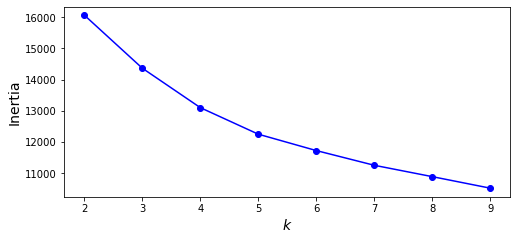

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.show()

In [15]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k]


#[model.labels_ for model in kmeans_per_k]

In [16]:
silhouette_scores

[0.22207771772255458,
 0.14064187582520257,
 0.13139171751199732,
 0.11955059828726286,
 0.11016249896495042,
 0.1078141026536958,
 0.09542071186570211,
 0.09818097135451996]

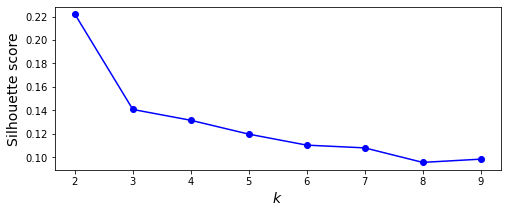

In [17]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
centroid = kmeans.cluster_centers_

pd.DataFrame(centroid,columns=df4.columns)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,-0.195564,0.065722,0.000370,-0.488454,-0.387214,-0.362031,-0.304234,-0.323663,-0.204961,-0.338789,-0.354290,-0.077066,-0.467316,-0.481544,-0.441148,-0.326965,-0.176844,-0.359978,-0.426113,-0.280494,-0.457380,-0.402721,-0.428318,-0.385330,-0.317146,-0.384969,-0.462802,-0.088308,-0.062969,-0.132211,-0.460667,-0.095294,-0.405737,-0.148312,-0.135779,-0.056229,-0.436676,-0.205737,-0.297069,-0.435033,-0.445872,-0.342212,-0.435491,-0.227025,-0.247407,-0.185077
1,0.426438,-0.143311,-0.000806,1.065102,0.844341,0.789428,0.663400,0.705764,0.446928,0.738748,0.772549,0.168048,1.019008,1.050033,0.961947,0.712966,0.385619,0.784952,0.929163,0.611632,0.997342,0.878155,0.933971,0.840233,0.691555,0.839446,1.009165,0.192560,0.137308,0.288294,1.004510,0.207794,0.884733,0.323402,0.296073,0.122609,0.952197,0.448620,0.647776,0.948613,0.972249,0.746213,0.949613,0.495040,0.539484,0.403571


In [19]:
df3['cluster'] = labels
df3.groupby('cluster').mean()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,26.563694,183.984076,78.834395,67.455414,70.722930,1.637134e+06,6162.420382,1.035032,3.117834,2.563694,2.877271e+06,67.955414,66.101911,52.277070,63.923567,30.060510,68.968153,45.974522,68.251592,66.398089,58.792994,59.958599,63.156051,51.541401,44.958599,44.219745,65.273885,66.678344,68.929936,65.101911,63.378981,61.636943,68.710191,68.595541,66.694268,75.156051,60.095541,56.273885,25.159236,67.503185,55.127389,64.773885,62.015924,28.633758,25.070064,22.350318
1,29.250000,182.756944,78.826389,76.826389,77.972222,1.164722e+07,38888.888889,1.652778,3.527778,3.180556,2.121339e+07,70.840278,76.194444,65.666667,73.298611,38.430556,73.145833,60.444444,77.791667,74.222222,70.847222,72.701389,73.347222,66.277778,59.229167,58.250000,75.354167,70.215278,71.291667,69.798611,75.465278,65.388889,78.368056,74.000000,71.090278,76.875000,71.333333,66.055556,35.430556,78.680556,68.625000,73.201389,75.013889,36.729167,33.645833,27.868056


In [20]:
clusterGerard = df3.loc[df3.short_name=='Gerard Moreno'].cluster.values[0]
clusterGerard

1

In [21]:
df_final = df3.loc[(df3.cluster==clusterGerard) & (df.short_name!="Gerard Moreno")][['short_name','value_eur']].sort_values('value_eur',ascending=False)
df_final.to_csv('Delanteros_substitutos.csv',index=False)
df_final

,short_name,value_eur
12,H. Kane,83000000
20,R. Lewandowski,64500000
17,S. Agüero,60000000
19,L. Suárez,53000000
34,E. Cavani,47000000
...,...,...
2969,Rubén Castro,1400000
6516,M. Urruti,1100000
4429,S. Silva,850000
5240,Nino,525000


## 2. Segmentación de clientes
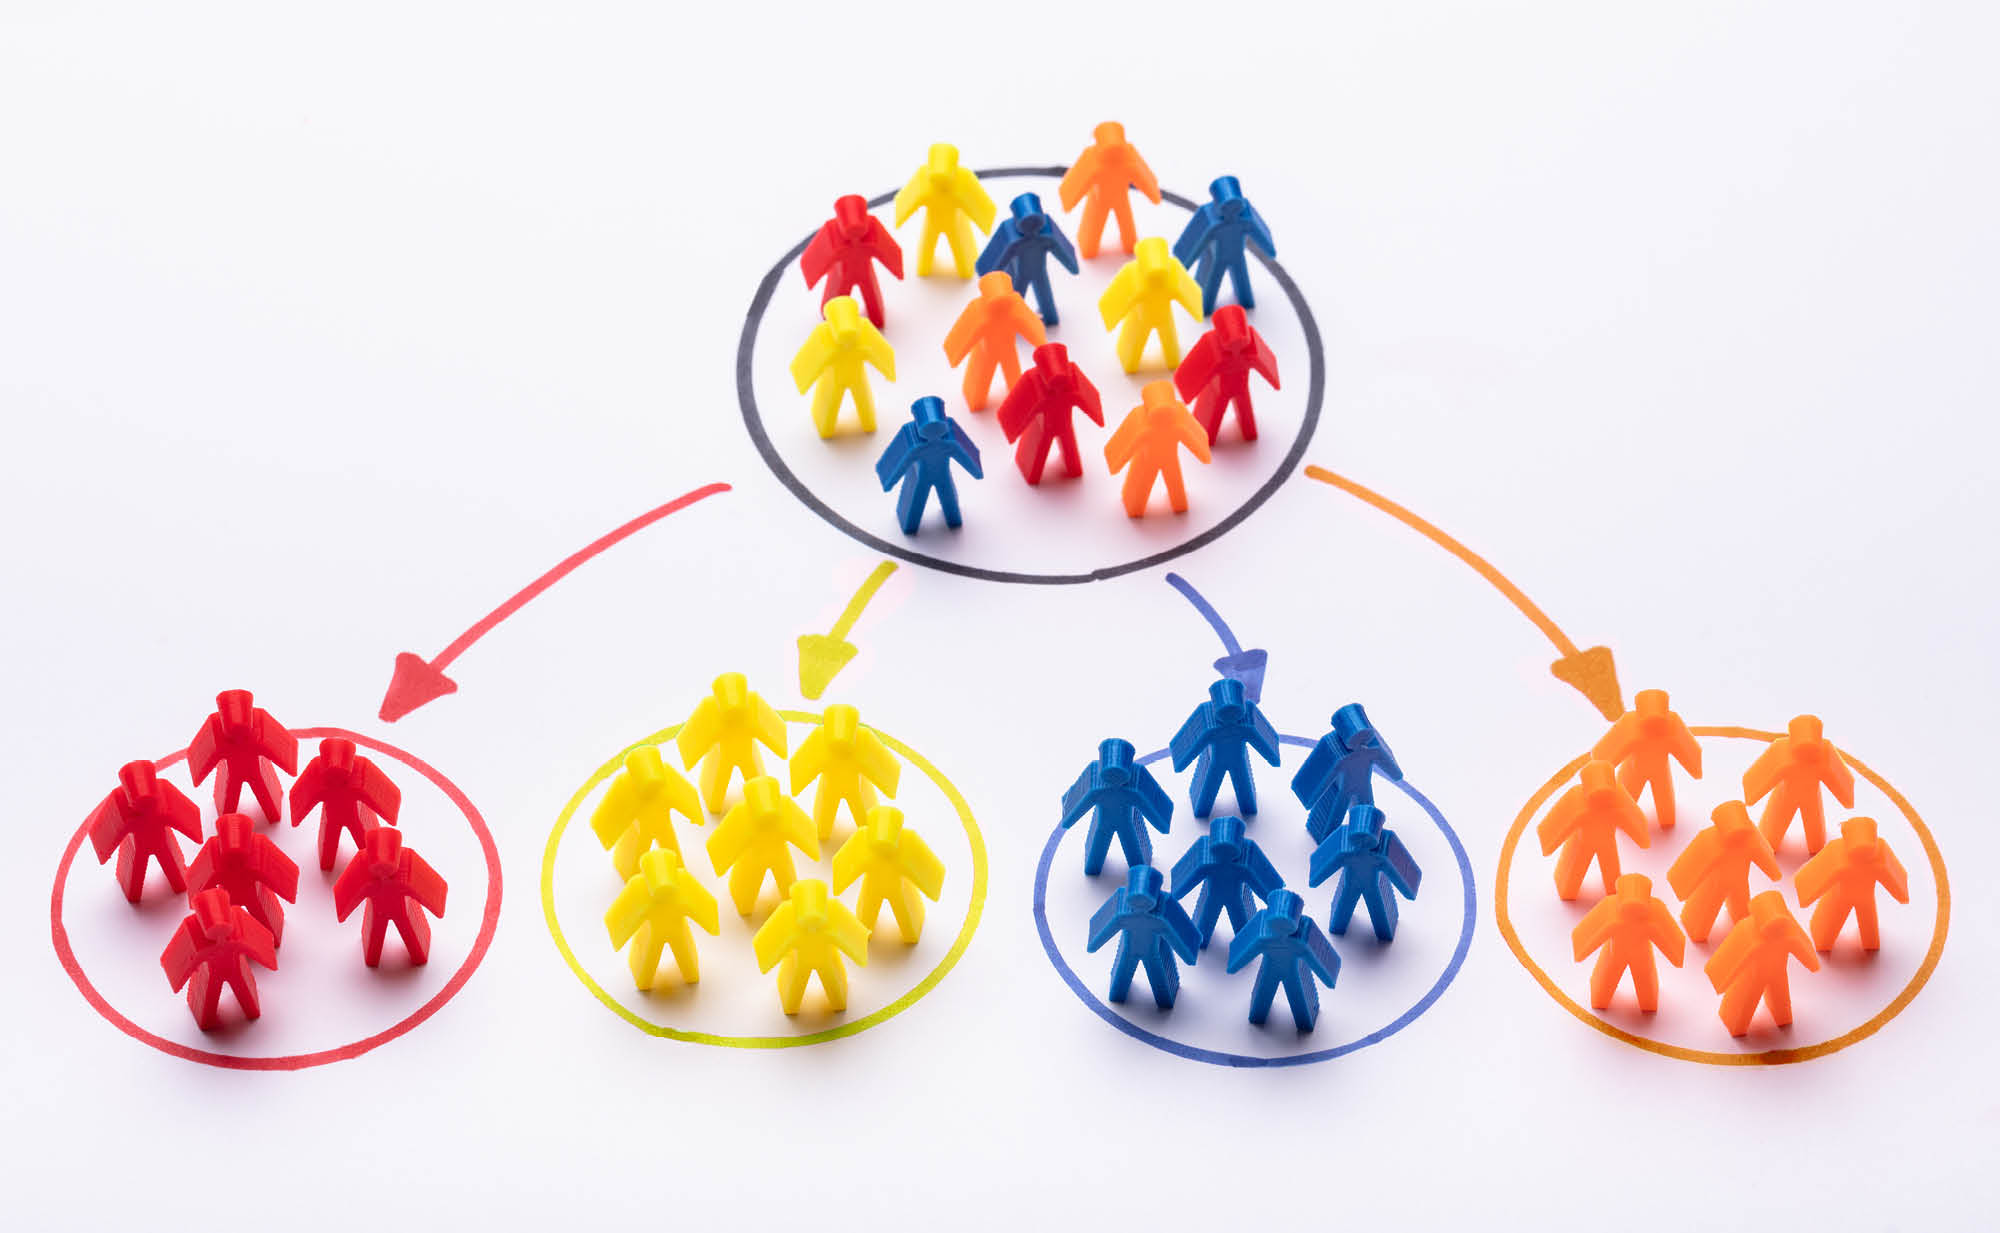

El siguiente dataset contiene información acerca del gasto de clientes en diferentes productos (frescos, leche, comestibles, congelados, detergentes y delicatessen). Se quieren diseñar diversas campañas publicitarias en función de los grupos homogéneos que se encuentren. ¡Encuéntralos!

* Utiliza k-means y cluster jerárquico.

* ¿Cuál es la proporción de clientes en cada cluster?

* Utiliza PCA con dos componentes para visualizar los clusters en un gráfico de 2 dimensiones e interpreta los resultados

In [22]:
data = pd.read_csv('data/customers.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data.drop(columns=['Channel','Region']))
data_scaled = pd.DataFrame(data_scaled,columns=data.drop(columns=['Channel','Region']).columns)
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [24]:
# Kmeans
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(data_scaled) for k in range(2, 10)]
silhouette_scores = [silhouette_score(data_scaled, model.labels_)
                     for model in kmeans_per_k]

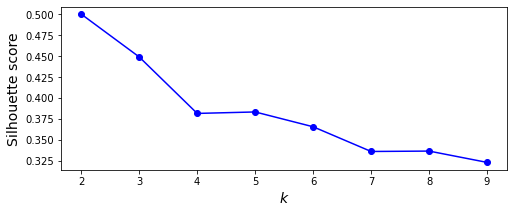

In [25]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled)
labels = kmeans.predict(data_scaled)

In [27]:
data['cluster'] = labels
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [28]:
data.groupby('cluster').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.578947,2.552632,4833.984211,9318.321053,13242.468421,1949.378947,5568.363158,1818.152632
1,1.128000,2.536000,17446.696000,3119.504000,3929.972000,3925.072000,839.472000,1301.976000


In [29]:
data.cluster.value_counts(normalize=True)

1    0.568182
0    0.431818
Name: cluster, dtype: float64

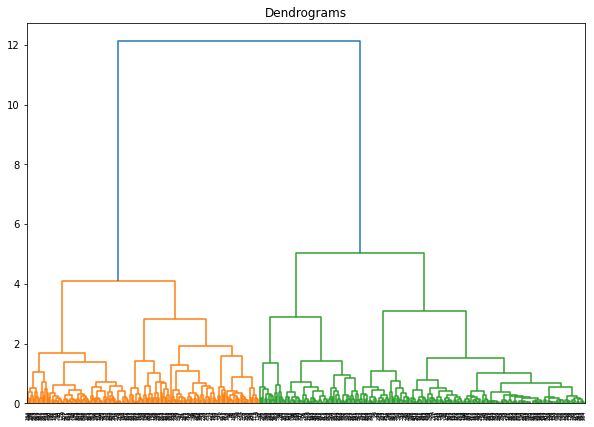

In [30]:
# Jerárquico
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data_scaled))

In [32]:
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...
435,0.776890,0.315197,0.419191,0.343549,0.004760,0.057646
436,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
437,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
438,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


In [33]:
reduced

,0,1
0,0.034037,-0.180421
1,0.351057,-0.046644
2,0.305375,0.055551
3,-0.383677,0.161789
4,-0.318591,-0.076970
...,...,...
435,-0.166266,0.106042
436,-0.607490,-0.097158
437,0.464837,-0.191884
438,-0.412001,-0.120676


In [34]:
km = KMeans(n_clusters=2,random_state=42).fit(data_scaled)

In [35]:
reduced['cluster']=km.labels_
reduced

,0,1,cluster
0,0.034037,-0.180421,1
1,0.351057,-0.046644,0
2,0.305375,0.055551,0
3,-0.383677,0.161789,1
4,-0.318591,-0.076970,1
...,...,...,...
435,-0.166266,0.106042,1
436,-0.607490,-0.097158,1
437,0.464837,-0.191884,0
438,-0.412001,-0.120676,1


In [36]:
data2 = data.drop(columns=['Channel','Region','cluster'])
pd.DataFrame(
data = pca.components_,
    columns=data2.columns,
    index = ['PC1','PC2']
)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,-0.720606,0.344109,0.537571,-0.106800,0.247658,0.024347
PC2,-0.325226,0.057227,-0.220449,0.898543,-0.167915,0.082343


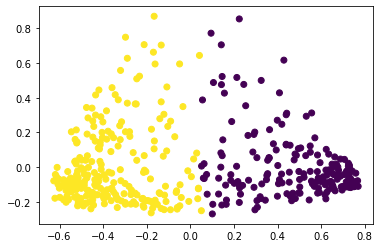

In [37]:
plt.scatter(reduced[0],reduced[1],c=reduced['cluster'])